In [321]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [322]:
df = pd.read_csv("spam.csv", encoding="latin1")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [323]:
df.shape

(5572, 5)

In [324]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [325]:
df['v1'].values

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype=object)

In [326]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [327]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)

In [328]:
df.sample(5)

,v1,v2
1432,ham,Thanks for ve lovely wisheds. You rock
3016,ham,One of the joys in lifeis waking up each daywi...
2783,ham,"Just arrived, see you in a couple days &lt;3"
1860,ham,"It could work, we'll reach a consensus at the ..."
3741,ham,Hey i'm bored... So i'm thinking of u... So wa...


In [329]:
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)

In [330]:
df.sample(5)

,target,text
3236,ham,Ron say fri leh. N he said ding tai feng cant ...
4725,ham,Jason says it's cool if we pick some up from h...
2334,ham,Do you like Italian food?
3268,ham,Raviyog Peripherals bhayandar east
4154,spam,Want a new Video Phone? 750 anytime any networ...


In [331]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [332]:
df['target'] = encoder.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [333]:
df.duplicated().sum()

403

In [334]:
df = df.drop_duplicates(keep='first')

In [335]:
df.shape

(5169, 2)

In [336]:
df.duplicated().sum()

0

In [337]:
#EDA (Exploratory Data Analysis)
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

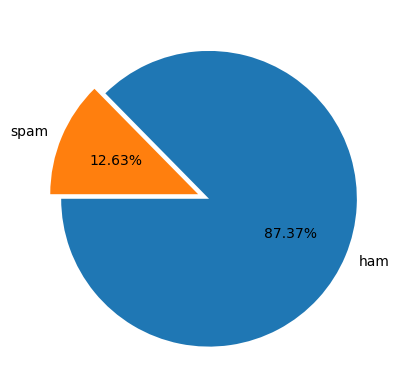

In [338]:
plt.pie(df['target'].value_counts(), autopct="%1.2f%%", startangle=180, explode=(0.08, 0), labels=['ham', 'spam'])
plt.show()

In [339]:
!pip install nltk

In [340]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/nobeldhakal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [341]:
from nltk.tokenize import sent_tokenize, word_tokenize
sentences = df['text'][0]
sentence = sent_tokenize(sentences)
sentence

['Go until jurong point, crazy..',
 'Available only in bugis n great world la e buffet... Cine there got amore wat...']

In [342]:
for s in sentence:
    word = word_tokenize(s)
    print(word)

['Go', 'until', 'jurong', 'point', ',', 'crazy', '..']
['Available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', '...', 'Cine', 'there', 'got', 'amore', 'wat', '...']


In [343]:
df['num_characters'] = df['text'].apply(len)
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [344]:
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [345]:
df.sample(5)

,target,text,num_characters,num_words
1231,0,have got * few things to do. may be in * pub l...,51,15
4687,0,Hmmm.but you should give it on one day..,40,9
3742,0,"Nah, Wednesday. When should I bring the mini c...",62,14
4029,0,"Cool, I'll text you in a few",28,9
5045,0,Desires- u going to doctor 4 liver. And get a ...,89,22


In [346]:
df['num_sentence'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [347]:
df.head()

,target,text,num_characters,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [348]:
df.describe()

,target,num_characters,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [349]:
df[df['target']==0][['num_characters','num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [350]:
df[df['target']==1][['num_characters','num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: ylabel='Count'>

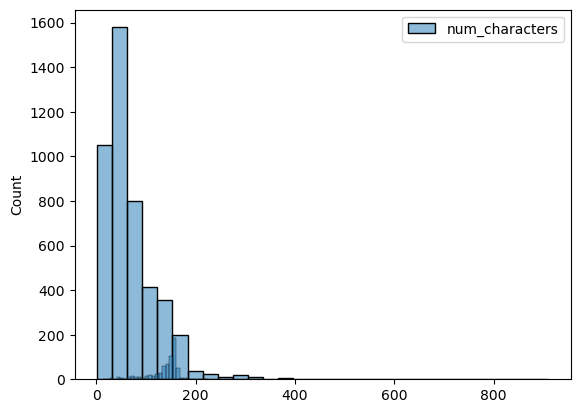

In [351]:
import seaborn as sns
sns.histplot(df[df['target']==0][['num_characters']], bins=30)
sns.histplot(df[df['target']==1][['num_characters']], bins=30)

In [352]:
df.head()

,target,text,num_characters,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [353]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
from nltk.corpus import stopwords
stopw = stopwords.words("english")

def transform(text):
    text = text.lower()
    text = word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopw and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        y.append(stemmer.stem(i))
    return " ".join(y)


In [354]:
df['transformed_text'] = df['text'].apply(lambda x: transform(x))
df.head()

,target,text,num_characters,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [355]:
!pip install wordcloud

In [356]:
from wordcloud import WordCloud
wc = WordCloud(height=500, width=500, min_font_size=10, background_color='white')
world_image = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

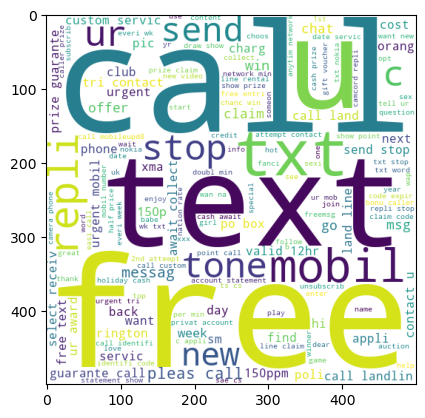

In [357]:
plt.imshow(world_image)

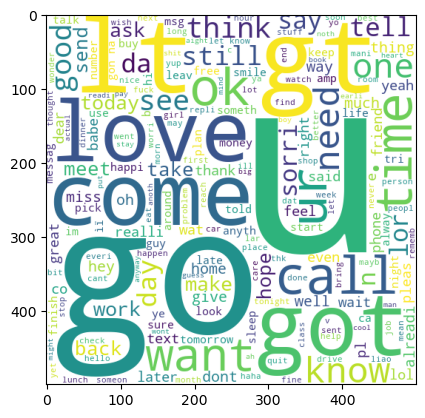

In [358]:
world_image_ham = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))
plt.imshow(world_image_ham)

In [359]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
len(spam_corpus)

9939

In [360]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


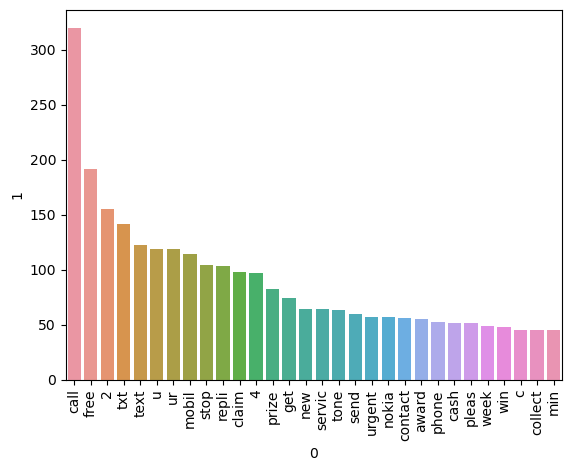

In [361]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0], 
            y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [362]:
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
len(ham_corpus)

35404

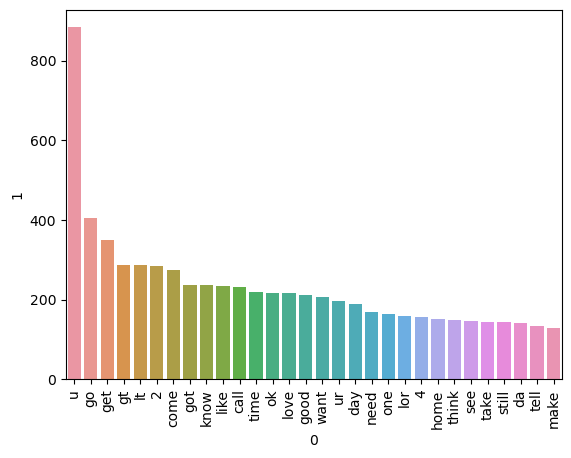

In [363]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0], 
            y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [364]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tf = TfidfVectorizer(max_features=3000)

In [365]:
X = tf.fit_transform(df['transformed_text']).toarray()

In [366]:
y = df['target'].values

In [367]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [368]:
mnb.fit(x_train, y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [369]:
import pickle
pickle.dump(tf, open('tfidf.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))